DSTC 870 - Project 

Selina Narain, Neelam Boywah, Zoya Haq

In [37]:
#import necessary libraries
import numpy as np
import pandas as pd
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
import seaborn as sns
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras import layers, models

import warnings
warnings.filterwarnings("ignore")

In [38]:
#Load the datset
#df = pd.read_csv('C:\Fall2023\DTSC870\DebiasedMal_Dataset.csv')
#df = pd.read_csv('/Users/zoya/Desktop/Malware Detection/DebiasedMal_Dataset.csv')
df = pd.read_csv('/Users/selinanarain/Desktop/MalwareDetection/DADA Datasets/DebiasedMal_Dataset.csv')

In [39]:
#Display first 5 lines of dataset
df.head()

,sha256,APK size,Year,Internet Permission,External storage,Uses Play Services,Generates UUIDs,Vibrate phone,NFC,Bluetooth,...,mempodroid,towelroot,supersu,dalvikvm,dexclassloader,loadclass,url_in_exec,mtk_su,dataset,malware
0,e17820c95fba3d7f6317608076d594dca64e3e1cd212fd...,2,4,1,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,debias-drebin-to-30k-01,1
1,5e4d39925907a31c28e9ef9d71af186be0c540805ffe31...,2,4,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,androzoo-100k-goodware,0
2,b3aad7818f9a1e1897b66642e12d5ceb8c1e220ac27d30...,2,6,1,1,1,0,0,0,0,...,0,0,0,0,0,0,1,0,debias-drebin-to-30k-01,1
3,91abeb3973b7b407c88846921a0a403df88e25e84d16ad...,2,6,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,debias-drebin-to-30k-01,1
4,c1f5cea2bd854f803b7957d61b905ba9c6f87faba34bc5...,2,6,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,androzoo-100k-goodware,0


In [40]:
# Check for missing values in dataset
print(df.isnull().sum())

sha256                 0
APK size               0
Year                   0
Internet Permission    0
External storage       0
                      ..
loadclass              0
url_in_exec            0
mtk_su                 0
dataset                0
malware                0
Length: 222, dtype: int64


In [41]:
# Drop any duplicates and display the size of dataset
df = df.drop_duplicates()
df.shape

(1654, 222)

In [42]:
# Iterate and display a list of the df columns
for col in df.columns:
    print(col)

sha256
APK size
Year
Internet Permission
External storage
Uses Play Services
Generates UUIDs
Vibrate phone
NFC
Bluetooth
Uses HTTP
Uses JSON
Specify User-Agent
apk_size
dex_date
year
minSdkVersion
targetSdkVersion
android.permission.READ_PHONE_STATE
android.permission.READ_CONTACTS
android.permission.READ_SMS
android.permission.CAMERA
android.permission.RECORD_AUDIO
android.permission.READ_EXTERNAL_STORAGE
android.permission.READ_HISTORY_BOOKMARKS
android.permission.ACCESS_NETWORK_STATE
android.permission.ACCESS_WIFI_STATE
android.permission.GET_TASKS
android.permission.ACTIVITY_RECOGNITION
android.permission.INTERNET
android.permission.SEND_SMS
android.permission.CALL_PHONE
android.permission.READ_CALL_LOG
android.permission.BLUETOOTH_ADMIN
android.permission.BLUETOOTH
android.permission.BODY_SENSORS
android.permission.GET_ACCOUNTS
android.permission.WRITE_EXTERNAL_STORAGE
android.permission.NFC
android.permission.WRITE_CONTACTS
android.permission.WRITE_SMS
android.permission.MOUNT_FO

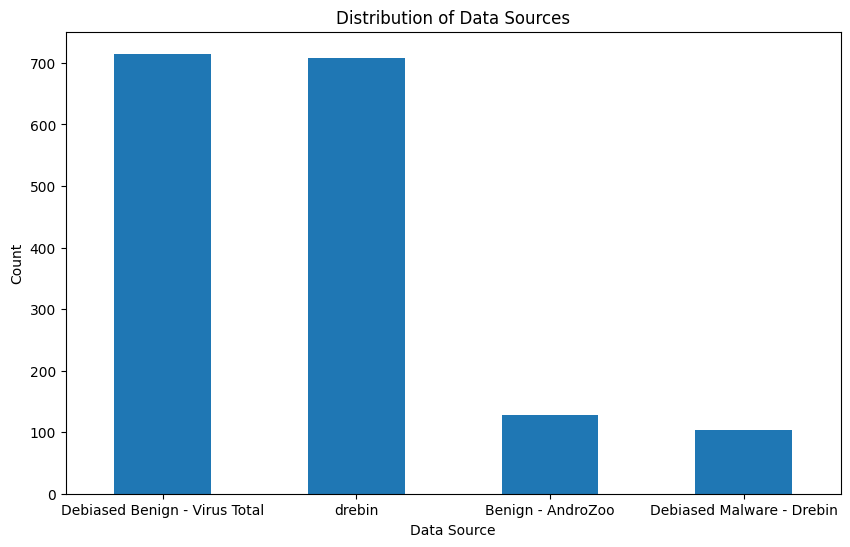

In [43]:
# Pulling counts of data from the dataset column
data_source = df['dataset'].value_counts()

# Replace the x-axis labels'
data_source.index = data_source.index.map(lambda x: 
    'Debiased Benign - Virus Total' if x == 'debias-goodware-2018-to-30k-non-secu-001' 
    else ('Benign - AndroZoo' if x == 'androzoo-100k-goodware' 
    else ('Debiased Malware - Drebin' if x == 'debias-drebin-to-30k-01' else x)))


# Plotting the bar graph
plt.figure(figsize=(10, 6))
data_source.plot(kind='bar')
plt.title('Distribution of Data Sources')
plt.xlabel('Data Source')
plt.xticks(rotation=0)
plt.ylabel('Count')
plt.show()

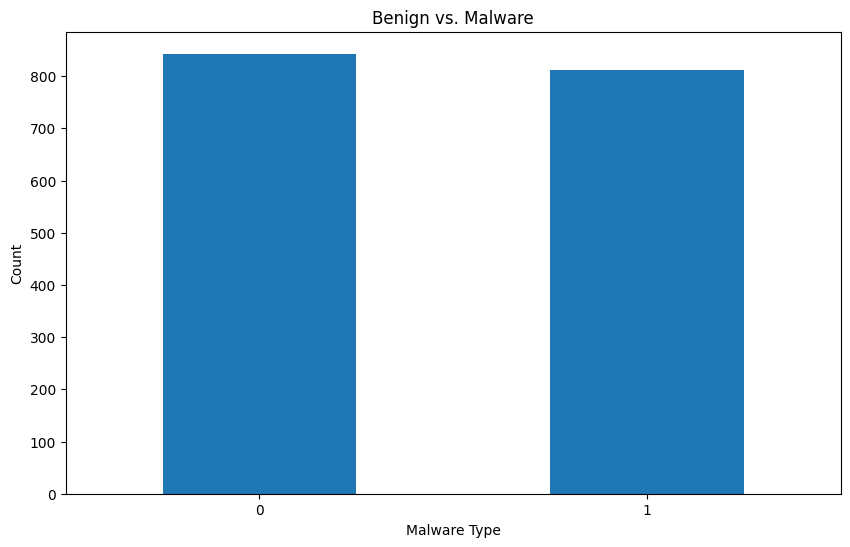

In [44]:
# Pulling counts of data from the malware column
malware_type = df['malware'].value_counts()

# Plotting the bar graph
plt.figure(figsize=(10, 6))
malware_type.plot(kind='bar')
plt.title('Benign vs. Malware')
plt.xlabel('Malware Type')
plt.xticks(rotation=0)
plt.ylabel('Count')
plt.show()

In [45]:
#Features
X = df.drop(columns = ['APK size', 'Year', 'year', 'dex_date', 'dataset', 'sha256', 'malware'])
#Target
y = df['malware']

#Split the data into training and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

X_train.head()

,Internet Permission,External storage,Uses Play Services,Generates UUIDs,Vibrate phone,NFC,Bluetooth,Uses HTTP,Uses JSON,Specify User-Agent,...,zerg,levitator,mempodroid,towelroot,supersu,dalvikvm,dexclassloader,loadclass,url_in_exec,mtk_su
1301,1,1,0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
306,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
192,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
309,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1168,1,0,0,0,0,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0


In [46]:
# Display shape of X_test
X_test.shape

(331, 215)

In [47]:
# Scale the data using Standard Scaler function from SKLearn
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [48]:
#0 is Benign, 1 is Malware
classes = [0, 1]

Naive Bayes Model

Naive Bayes Classifier Accuracy: 0.6435
Naive Bayes Classifier Precision: 0.7547
Naive Bayes Classifier Recall: 0.6435
Naive Bayes Classifier F1-Score: 0.5967
Classification Report: 
               precision    recall  f1-score   support

           0       0.59      0.98      0.74       168
           1       0.92      0.30      0.45       163

    accuracy                           0.64       331
   macro avg       0.76      0.64      0.59       331
weighted avg       0.75      0.64      0.60       331

Confusion Matrix:  
 [[164   4]
 [114  49]]


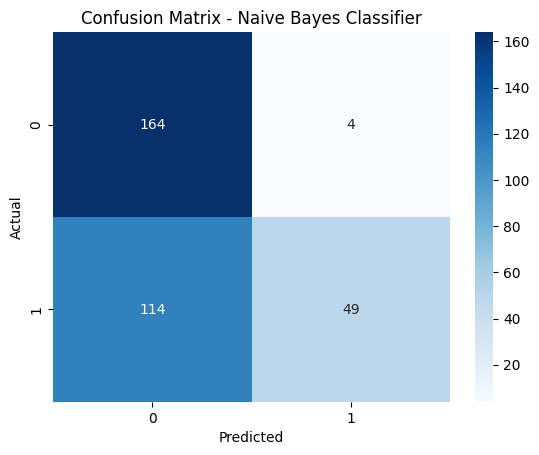

In [49]:
#Create Naive Bayes Model
naiveBayesModel = GaussianNB()

#Fit X_train and y_train into the model
naiveBayesModel.fit(X_train, y_train)

#Predict the labels using X_test
naivebayes_y_pred = naiveBayesModel.predict(X_test)

#Calculate the metrics for the Naive Bayes Classifier
naiveBayesAccuracy = accuracy_score(y_test, naivebayes_y_pred)
naiveBayesPrecision = precision_score(y_test, naivebayes_y_pred,average = 'weighted')
naiveBayesRecall = recall_score(y_test, naivebayes_y_pred,average = 'weighted')
naiveBayesf1 = f1_score(y_test, naivebayes_y_pred,average = 'weighted')

#Display the metrics for the Naive Bayes Classifier
print("Naive Bayes Classifier Accuracy: %.4f" % (naiveBayesAccuracy))
print("Naive Bayes Classifier Precision: %.4f" % (naiveBayesPrecision))
print("Naive Bayes Classifier Recall: %.4f" % (naiveBayesRecall))
print("Naive Bayes Classifier F1-Score: %.4f" % (naiveBayesf1))
print("Classification Report: " "\n", classification_report(y_test, naivebayes_y_pred))
print("Confusion Matrix: ", "\n", confusion_matrix(y_test, naivebayes_y_pred))

#Create and display heatmap
conf_matrix = confusion_matrix(y_test, naivebayes_y_pred, labels = classes)
sns.heatmap(conf_matrix , cmap = 'Blues', fmt = 'd', annot = True)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Naive Bayes Classifier')
plt.show()


Random Forest Model

Random Forest Classifier Accuracy: 0.9637
Random Forest Classifier Precision: 0.9640
Random Forest Classifier Recall: 0.9637
Random Forest Classifier F1-Score: 0.9637
Classification Report: 
               precision    recall  f1-score   support

           0       0.95      0.98      0.96       168
           1       0.97      0.95      0.96       163

    accuracy                           0.96       331
   macro avg       0.96      0.96      0.96       331
weighted avg       0.96      0.96      0.96       331

Confusion Matrix:  
 [[164   4]
 [  8 155]]


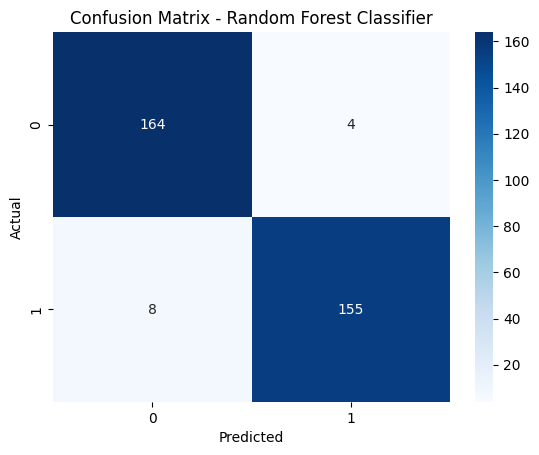

In [50]:
#Create Random Forest Model
random_forest_model = RandomForestClassifier(n_estimators = 300, random_state = 42)

#Fit and train classifier on the training data
random_forest_model.fit(X_train, y_train)

#Predict the labels using X_test
y_pred_rf = random_forest_model.predict(X_test)

#Calculate the metrics for the Random Forest Classifier
randomForestAccuracy = accuracy_score(y_test, y_pred_rf)
randomForestPrecision = precision_score(y_test, y_pred_rf,average = 'weighted')
randomForestRecall = recall_score(y_test, y_pred_rf,average = 'weighted')
randomForestF1 = f1_score(y_test, y_pred_rf,average = 'weighted')

#Display the metrics for the Random Forest Classifier
print("Random Forest Classifier Accuracy: %.4f" % randomForestAccuracy)
print("Random Forest Classifier Precision: %.4f" % randomForestPrecision)
print("Random Forest Classifier Recall: %.4f" % randomForestRecall)
print("Random Forest Classifier F1-Score: %.4f" % randomForestF1)
print("Classification Report: " "\n", classification_report(y_test, y_pred_rf))
print("Confusion Matrix: ", "\n", confusion_matrix(y_test, y_pred_rf))

#Create and display heatmap
conf_matrix = confusion_matrix(y_test, y_pred_rf, labels = classes)
sns.heatmap(conf_matrix , cmap = 'Blues', fmt = 'd', annot = True)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Random Forest Classifier')
plt.show()


Metrics on Original Predictions:
Original Accuracy: 0.9637
Precision: 0.9640
Recall: 0.9637
F1-Score: 0.9637

Metrics on Adversarial Predictions:
Accuracy on Adversarial Examples: 0.5317
Precision: 0.7564
Recall: 0.5317
F1-Score: 0.3934


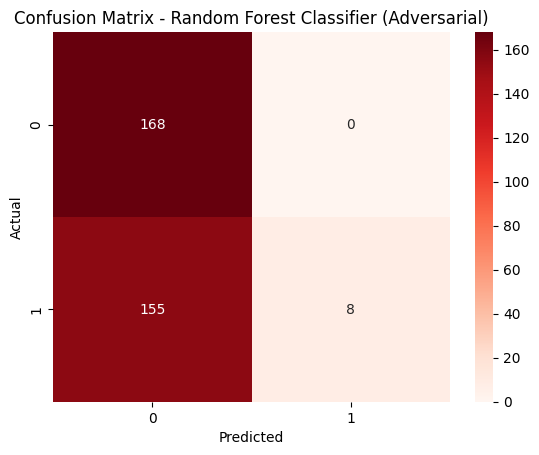

In [51]:
# Function to generate adversarial examples using feature importances
def iterative_fgsm_attack_clip_range(X, importance, epsilon, clip_min, clip_max, num_iterations):
    perturbation = epsilon * importance
    X_adv = X.copy()

    for _ in range(num_iterations):
        X_adv += perturbation
        X_adv = np.clip(X_adv, clip_min, clip_max)

    return X_adv

# Calculate feature importances
importance = random_forest_model.feature_importances_
X_test_flt = X_test.astype('float64')

# Generate adversarial examples using iterative FGSM attack with clipping, increased epsilon, and more iterations
X_test_adv = iterative_fgsm_attack_clip_range(X_test_flt, importance, epsilon=1.0, clip_min=-1, 
                                              clip_max=2, num_iterations=100)

# Evaluate the model on adversarial examples
y_pred_rf_adv = random_forest_model.predict(X_test_adv)

# Calculate metrics on adversarial predictions
accuracy_adv = accuracy_score(y_test, y_pred_rf_adv)
precision_adv = precision_score(y_test, y_pred_rf_adv, average='weighted')
recall_adv = recall_score(y_test, y_pred_rf_adv, average='weighted')
f1_adv = f1_score(y_test, y_pred_rf_adv, average='weighted')

# Print metrics for original predictions
print("\nMetrics on Original Predictions:")
print("Original Accuracy: %.4f" % (randomForestAccuracy))
print(f"Precision: {randomForestPrecision:.4f}")
print(f"Recall: {randomForestRecall:.4f}")
print(f"F1-Score: {randomForestF1:.4f}")

# Print metrics for adversarial predictions
print("\nMetrics on Adversarial Predictions:")
print(f"Accuracy on Adversarial Examples: {accuracy_adv:.4f}")
print(f"Precision: {precision_adv:.4f}")
print(f"Recall: {recall_adv:.4f}")
print(f"F1-Score: {f1_adv:.4f}")

# Display the confusion matrix for the Random Forest Classifier on adversarial examples
conf_matrix_adv = confusion_matrix(y_test, y_pred_rf_adv, labels=classes)
sns.heatmap(conf_matrix_adv, cmap='Reds', fmt='d', annot=True)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Random Forest Classifier (Adversarial)')
plt.show()


Metrics on Adversarial Predictions (Defended Model):
Accuracy on Adversarial Examples: 0.9486
Precision: 0.9487
Recall: 0.9486
F1-Score: 0.9486


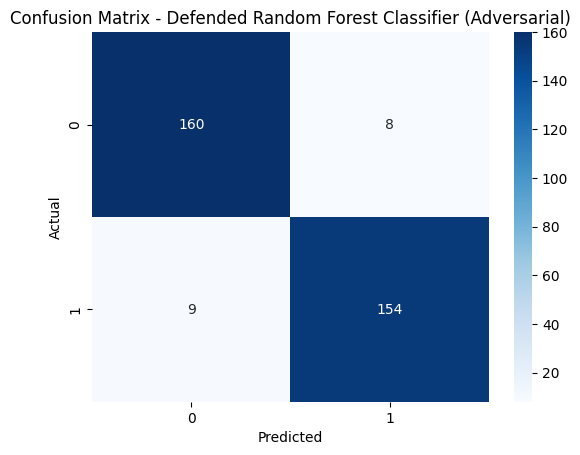

In [52]:
# Function to perform adversarial training
def adversarial_training(model, X_train, y_train, importance, epsilon, clip_min, clip_max, num_iterations):
    for _ in range(num_iterations):
        # Generate adversarial examples
        X_train_adv = iterative_fgsm_attack_clip_range(X_train, importance, epsilon, clip_min, clip_max, num_iterations)
        
        # Ensure consistent data types
        X_train_combined = np.vstack([X_train.astype('float64'), X_train_adv])
        y_train_combined = np.hstack([y_train, y_train])
        
        # Shuffle the combined data
        idx = np.random.permutation(len(X_train_combined))
        X_train_combined_shuffled = X_train_combined[idx]
        y_train_combined_shuffled = y_train_combined[idx]
        
        # Retrain the model on the combined dataset
        model.fit(X_train_combined_shuffled, y_train_combined_shuffled)
    
    return model

# Convert data types for consistency
X_train_flt = X_train.astype('float64')
X_test_adv = X_test_adv.astype('float64')

# Adversarial training on the Random Forest model
random_forest_model_defense = adversarial_training(random_forest_model, X_train, y_train, 
                                                   importance, epsilon=1.0, clip_min=-1, clip_max=2, num_iterations=100)

# Evaluate the defended model on adversarial examples
y_pred_rf_adv_defense = random_forest_model_defense.predict(X_test_adv)

# Calculate metrics on adversarial predictions for the defended model
accuracy_adv_defense = accuracy_score(y_test, y_pred_rf_adv_defense)
precision_adv_defense = precision_score(y_test, y_pred_rf_adv_defense, average='weighted')
recall_adv_defense = recall_score(y_test, y_pred_rf_adv_defense, average='weighted')
f1_adv_defense = f1_score(y_test, y_pred_rf_adv_defense, average='weighted')

# Print metrics for adversarial predictions for the defended model
print("\nMetrics on Adversarial Predictions (Defended Model):")
print(f"Accuracy on Adversarial Examples: {accuracy_adv_defense:.4f}")
print(f"Precision: {precision_adv_defense:.4f}")
print(f"Recall: {recall_adv_defense:.4f}")
print(f"F1-Score: {f1_adv_defense:.4f}")

# Display the confusion matrix for the defended Random Forest Classifier on adversarial examples
conf_matrix_adv_defense = confusion_matrix(y_test, y_pred_rf_adv_defense, labels=classes)
sns.heatmap(conf_matrix_adv_defense, cmap='Blues', fmt='d', annot=True)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Defended Random Forest Classifier (Adversarial)')
plt.show()

In [53]:
#Models and corresponding colors
models_attack_defense_vis = ['Original Model', 'FGSM Attack', 'Defense']

#Metric Variables
attack_defense_accuracy_scores = [randomForestAccuracy, accuracy_adv, accuracy_adv_defense]
attack_defense_precision_scores = [randomForestPrecision, precision_adv, precision_adv_defense]
attack_defense_recall_scores = [randomForestRecall, recall_adv, recall_adv_defense]
attack_defense_f1_scores = [randomForestF1, f1_adv, f1_adv_defense]

#Define metrics variable to define the 4 metrics calculated
attack_defense_metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']

#Data for each of the metrics
attack_defense_data = [attack_defense_accuracy_scores, attack_defense_precision_scores, attack_defense_recall_scores, attack_defense_f1_scores]

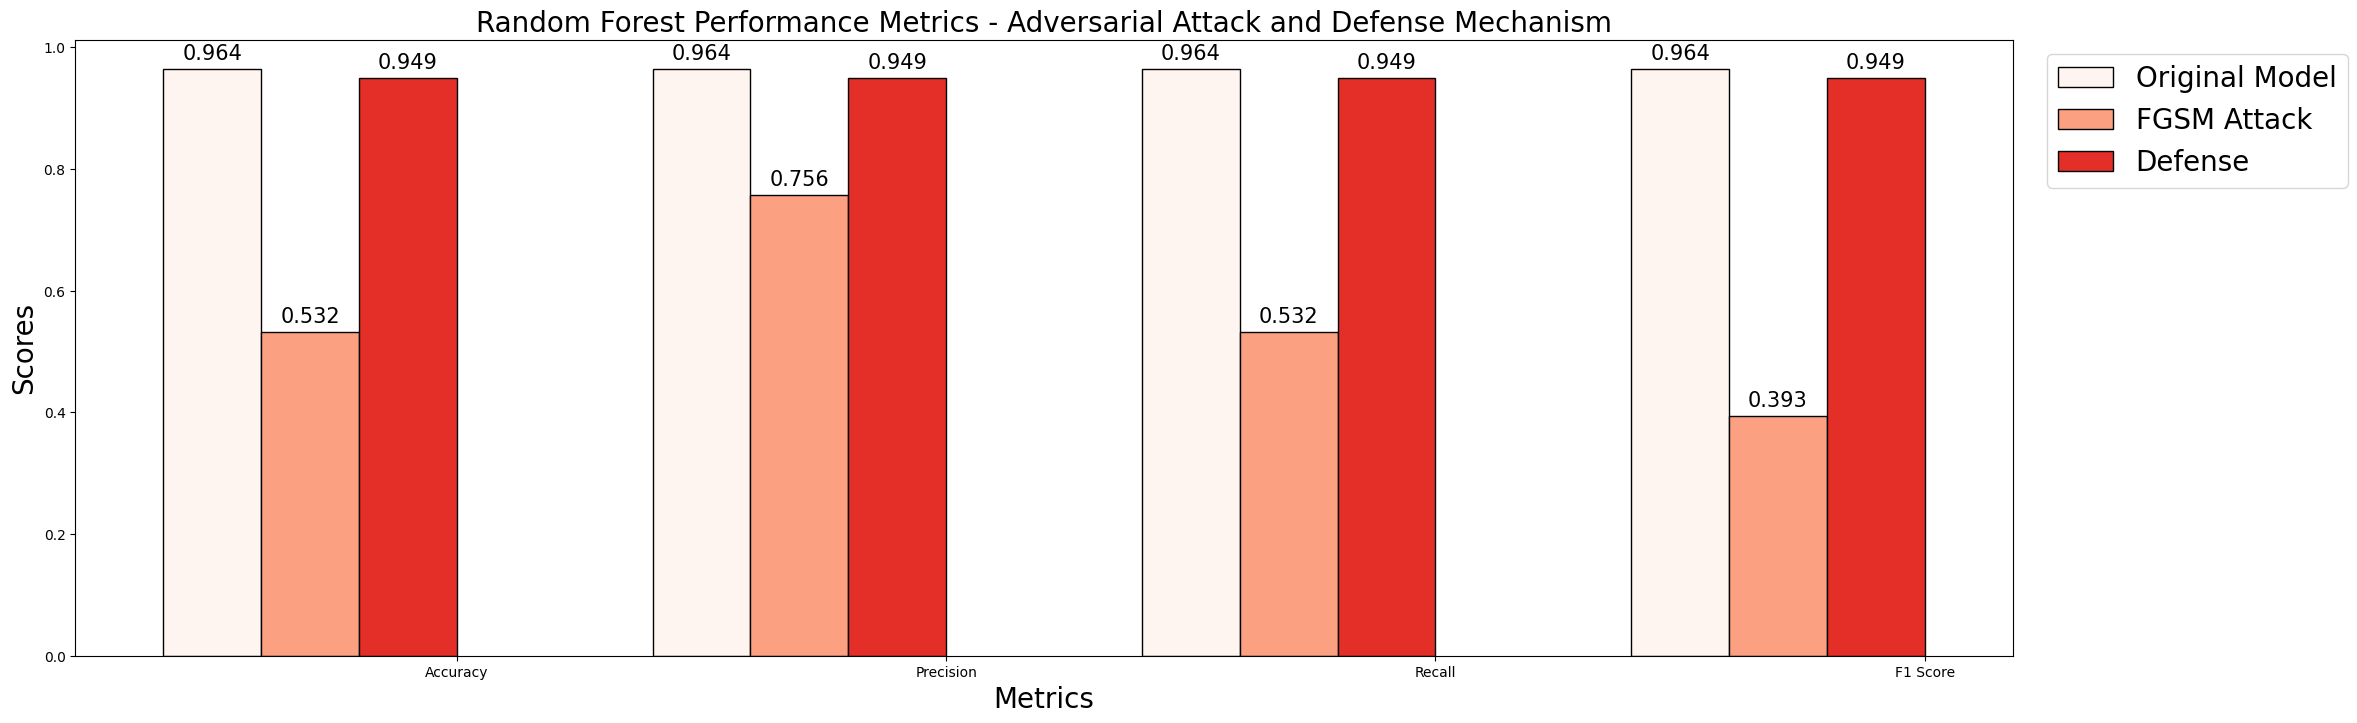

In [54]:
from matplotlib.cm import Reds

fig, ax = plt.subplots(figsize=(25, 8))

x = np.arange(len(attack_defense_data))

# Width of each bar
width = 0.2

# Create a range of blue colors using the 'Blues' colormap
color_map = Reds
colors = [color_map(i / len(models_attack_defense_vis)) for i in range(len(models_attack_defense_vis))]

# Classifier and plot bars with a range of blue colors
for i, advmodels in enumerate(models_attack_defense_vis):
    bars = ax.bar(x + i * width, [d[i] for d in attack_defense_data], width, label=advmodels, color=colors[i], edgecolor='black')
    for bar in bars:
        yval = bar.get_height()
        ax.text(bar.get_x() + bar.get_width() / 2, yval + 0.01, round(yval, 3), ha='center', va='bottom', fontsize = '15')

# Labels, Graph title, and Legend on the left
ax.set_xlabel('Metrics', fontsize = '20')
ax.set_ylabel('Scores', fontsize = '20')
ax.set_title('Random Forest Performance Metrics - Adversarial Attack and Defense Mechanism', fontsize = '20')
ax.set_xticks(x + 2.5 * width)
ax.set_xticklabels(attack_defense_metrics)
ax.legend(loc='upper right', bbox_to_anchor=(1.18, 1), ncol=1, fontsize = '20')

# Display the plot
plt.show()

Logistic Regression Model

Logistic Regression Accuracy: 0.9094
Logistic Regression Precision: 0.9094
Logistic Regression Recall: 0.9094
Logistic Regression F1-Score: 0.9094
Classification Report: 
               precision    recall  f1-score   support

           0       0.90      0.93      0.91       168
           1       0.92      0.89      0.91       163

    accuracy                           0.91       331
   macro avg       0.91      0.91      0.91       331
weighted avg       0.91      0.91      0.91       331

Confusion Matrix:  
 [[156  12]
 [ 18 145]]


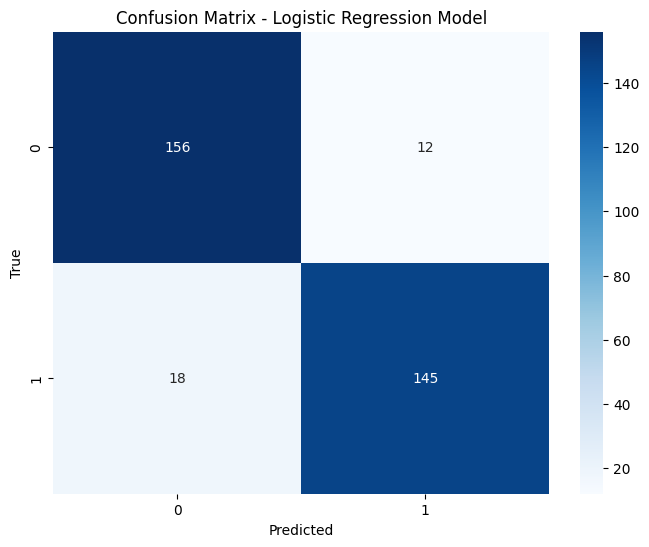

In [55]:
#Create Logistic Regression Model
logisticRegressionModel = LogisticRegression(max_iter = 1000, random_state = 42)

#Fit and train classifier on the training data
logisticRegressionModel.fit(X_train, y_train)

#Predict the labels using X_test
logisticregression_y_pred = logisticRegressionModel.predict(X_test)

#Calculate the metrics for the Logistic Regression Classifier
logisticRegressionAccuracy = accuracy_score(y_test, logisticregression_y_pred)
logisticRegressionPrecision = precision_score(y_test, logisticregression_y_pred,average = 'weighted')
logisticRegressionRecall = recall_score(y_test, logisticregression_y_pred,average = 'weighted')
logisticRegressionF1 = f1_score(y_test, logisticregression_y_pred,average = 'weighted')

#Display the metrics for the Logistic Regression Classifier
print("Logistic Regression Accuracy: %.4f" % (logisticRegressionAccuracy))
print("Logistic Regression Precision: %.4f" % (logisticRegressionAccuracy))
print("Logistic Regression Recall: %.4f" % (logisticRegressionAccuracy))
print("Logistic Regression F1-Score: %.4f" % (logisticRegressionAccuracy))
print("Classification Report: " "\n", classification_report(y_test, logisticregression_y_pred))
print("Confusion Matrix: ", "\n", confusion_matrix(y_test, logisticregression_y_pred))

#Create and display heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, logisticregression_y_pred), annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
plt.title('Confusion Matrix - Logistic Regression Model')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

K-Nearest Neighbors Model

Best K value: 5
K-Nearest Neighbors Classifier Accuracy: 0.9245
K-Nearest Neighbors Classifier Precision: 0.9279
K-Nearest Neighbors Classifier Recall: 0.9245
K-Nearest Neighbors Classifier F1-Score: 0.9243
Classification Report: 
               precision    recall  f1-score   support

           0       0.89      0.97      0.93       168
           1       0.97      0.88      0.92       163

    accuracy                           0.92       331
   macro avg       0.93      0.92      0.92       331
weighted avg       0.93      0.92      0.92       331

Confusion Matrix:  
 [[163   5]
 [ 20 143]]


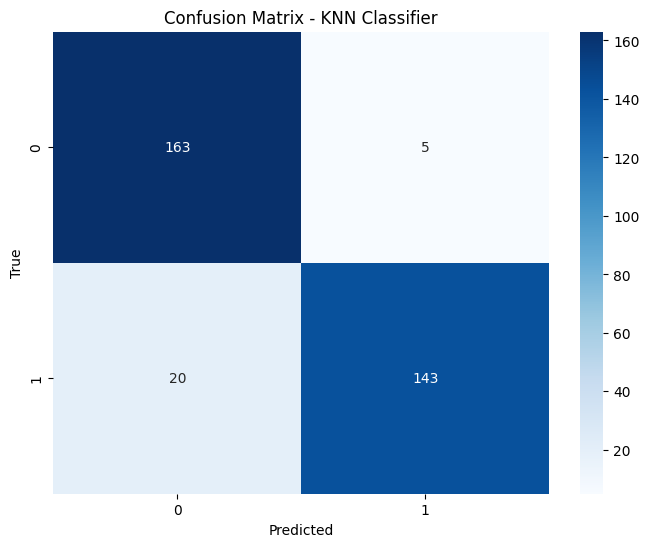

In [56]:
#range of K values 
K_values = [2, 3, 4, 5, 7, 9, 10, 11]

K_best = None
accuracy_best = 0

#Create KNN Model using K_values for the value of n_neighbors
for k in K_values:
    KNN_model = KNeighborsClassifier(n_neighbors = k)
    #perform cross-validation to evaluate the KNN model
    scores = cross_val_score(KNN_model, X_train, y_train, cv = 5, scoring = 'accuracy')
    mean_accuracy = scores.mean()
    if mean_accuracy > accuracy_best:
        accuracy_best = mean_accuracy
        K_best = k

#Training the KNN model with the best k value
model_KNN_best = KNeighborsClassifier(n_neighbors = K_best)
model_KNN_best.fit(X_train, y_train)

#Predict the labels using X_test
KNN_y_pred = model_KNN_best.predict(X_test)

#Calculate the metrics for the KNN Classifier
KNN_Accuracy = accuracy_score(y_test, KNN_y_pred)
KNN_Precision = precision_score(y_test, KNN_y_pred, average='weighted')
KNN_Recall = recall_score(y_test, KNN_y_pred, average='weighted')
KNN_F1 = f1_score(y_test, KNN_y_pred, average='weighted')

#Display the metrics for the KNN Classifier
print("Best K value:", K_best)
print("K-Nearest Neighbors Classifier Accuracy: %.4f" % (KNN_Accuracy))
print("K-Nearest Neighbors Classifier Precision: %.4f" % (KNN_Precision))
print("K-Nearest Neighbors Classifier Recall: %.4f" % (KNN_Recall))
print("K-Nearest Neighbors Classifier F1-Score: %.4f" % (KNN_F1))
print("Classification Report: " "\n", classification_report(y_test, KNN_y_pred))
print("Confusion Matrix: ", "\n", confusion_matrix(y_test, KNN_y_pred))

#Create and display heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, KNN_y_pred), annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
plt.title('Confusion Matrix - KNN Classifier')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

SVM Model (Kernel - 'rbf')

[LibSVM]*
optimization finished, #iter = 875
obj = -270.633379, rho = 0.140787
nSV = 553, nBSV = 256
Total nSV = 553
SVM RBF Classifier Accuracy: 0.9366
SVM RBF Classifier Precision: 0.9369
SVM RBF Classifier Recall: 0.9366
SVM RBF Classifier F1-Score: 0.9365
Classification Report: 
               precision    recall  f1-score   support

           0       0.92      0.95      0.94       168
           1       0.95      0.92      0.93       163

    accuracy                           0.94       331
   macro avg       0.94      0.94      0.94       331
weighted avg       0.94      0.94      0.94       331

Confusion Matrix:  
 [[160   8]
 [ 13 150]]


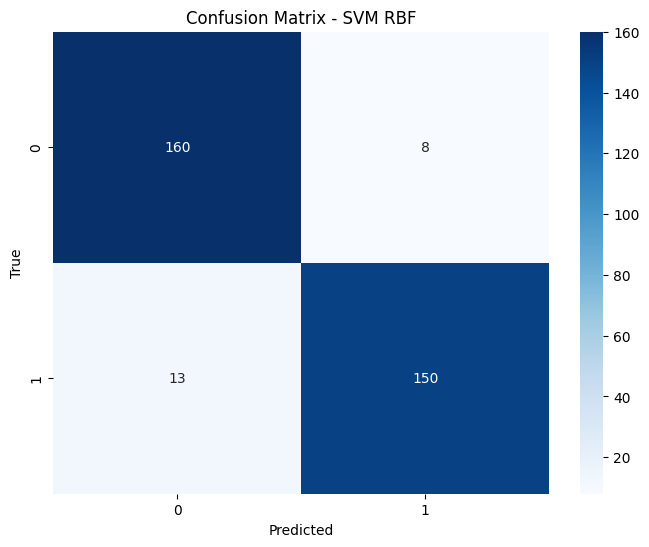

In [57]:
#Create SVM Model
svmClassifierRBF = SVC(kernel = 'rbf', C = 1.0, random_state = 42, verbose = 5, max_iter = 1000, gamma = 'auto')

#Fit and train classifier on the training data
svmClassifierRBF.fit(X_train, y_train)

#Predict the labels using X_test
svmRBF_y_pred = svmClassifierRBF.predict(X_test)

#Calculate the metrics for the SVM Classifier
svmRBF_Accuracy = accuracy_score(y_test, svmRBF_y_pred )
svmRBF_Precision = precision_score(y_test, svmRBF_y_pred ,average = 'weighted')
svmRBF_Recall = recall_score(y_test, svmRBF_y_pred ,average = 'weighted')
svmRBF_F1 = f1_score(y_test, svmRBF_y_pred ,average = 'weighted')

#Display the metrics for the SVM Classifier
print("SVM RBF Classifier Accuracy: %.4f" % (svmRBF_Accuracy))
print("SVM RBF Classifier Precision: %.4f" % (svmRBF_Precision))
print("SVM RBF Classifier Recall: %.4f" % (svmRBF_Recall))
print("SVM RBF Classifier F1-Score: %.4f" % (svmRBF_F1))
print("Classification Report: " "\n", classification_report(y_test, svmRBF_y_pred))
print("Confusion Matrix: ", "\n", confusion_matrix(y_test, svmRBF_y_pred))

#Create and display heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, svmRBF_y_pred), annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
plt.title('Confusion Matrix - SVM RBF')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

SVM Model (Kernel - 'linear')

[LibSVM].......................................*...............................................*...................................................................................*.......*
optimization finished, #iter = 176247
obj = -137.952941, rho = 0.144248
nSV = 251, nBSV = 96
Total nSV = 251
SVM Linear Classifier Accuracy: 0.9003
SVM Linear Classifier Precision: 0.9006
SVM Linear Classifier Recall: 0.9003
SVM Linear Classifier F1-Score: 0.9003
Classification Report: 
               precision    recall  f1-score   support

           0       0.89      0.92      0.90       168
           1       0.91      0.88      0.90       163

    accuracy                           0.90       331
   macro avg       0.90      0.90      0.90       331
weighted avg       0.90      0.90      0.90       331

Confusion Matrix:  
 [[154  14]
 [ 19 144]]


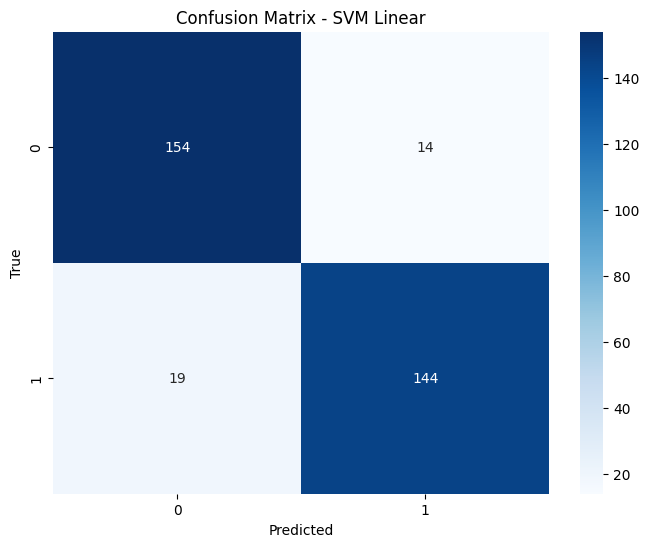

In [58]:
#Create SVM Model
svm_LinearClassifier = SVC(kernel = 'linear', C = 1.0, random_state = 42, verbose = 5, max_iter = 1000000, gamma = 'scale')

#Fit and train classifier on the training data
svm_LinearClassifier.fit(X_train, y_train)

#Predict the labels using X_test
svm_Linear_y_pred = svm_LinearClassifier.predict(X_test)

#Calculate the metrics for the SVM Classifier
svm_linear_Accuracy = accuracy_score(y_test, svm_Linear_y_pred)
svm_Linear_Precision = precision_score(y_test, svm_Linear_y_pred,average = 'weighted')
svm_Linear_Recall = recall_score(y_test, svm_Linear_y_pred,average = 'weighted')
svm_Linear_F1 = f1_score(y_test, svm_Linear_y_pred,average = 'weighted')

#Display the metrics for the SVM Classifier
print("SVM Linear Classifier Accuracy: %.4f" % (svm_linear_Accuracy))
print("SVM Linear Classifier Precision: %.4f" % (svm_Linear_Precision))
print("SVM Linear Classifier Recall: %.4f" % (svm_Linear_Recall))
print("SVM Linear Classifier F1-Score: %.4f" % (svm_Linear_F1))
print("Classification Report: " "\n", classification_report(y_test, svm_Linear_y_pred))
print("Confusion Matrix: ", "\n", confusion_matrix(y_test, svm_Linear_y_pred))

#Create and display heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, svm_Linear_y_pred), annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
plt.title('Confusion Matrix - SVM Linear')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

Deep Learning - Dense Neural Network Model

In [59]:
#Read dataset
#dataframe = pd.read_csv('C:\Fall2023\DTSC870\DebiasedMal_Dataset.csv')
#dataframe = pd.read_csv('/Users/zoya/Desktop/Malware Detection/DebiasedMal_Dataset.csv')
dataframe = pd.read_csv('/Users/selinanarain/Desktop/MalwareDetection/DADA Datasets/DebiasedMal_Dataset.csv')

In [60]:
#Display the class values
print(dataframe['malware'].unique())

[1 0]


In [61]:
# Iterate and display a list of the df columns
for col in df.columns:
    print(col)

sha256
APK size
Year
Internet Permission
External storage
Uses Play Services
Generates UUIDs
Vibrate phone
NFC
Bluetooth
Uses HTTP
Uses JSON
Specify User-Agent
apk_size
dex_date
year
minSdkVersion
targetSdkVersion
android.permission.READ_PHONE_STATE
android.permission.READ_CONTACTS
android.permission.READ_SMS
android.permission.CAMERA
android.permission.RECORD_AUDIO
android.permission.READ_EXTERNAL_STORAGE
android.permission.READ_HISTORY_BOOKMARKS
android.permission.ACCESS_NETWORK_STATE
android.permission.ACCESS_WIFI_STATE
android.permission.GET_TASKS
android.permission.ACTIVITY_RECOGNITION
android.permission.INTERNET
android.permission.SEND_SMS
android.permission.CALL_PHONE
android.permission.READ_CALL_LOG
android.permission.BLUETOOTH_ADMIN
android.permission.BLUETOOTH
android.permission.BODY_SENSORS
android.permission.GET_ACCOUNTS
android.permission.WRITE_EXTERNAL_STORAGE
android.permission.NFC
android.permission.WRITE_CONTACTS
android.permission.WRITE_SMS
android.permission.MOUNT_FO

In [62]:
#Display the shape of the dataframe
dataframe.shape

(1654, 222)

In [63]:
#Define the features and target
#For X, use all features except: 'APK size', 'Year', 'year', 'dex_date', 'dataset', 'sha256', 'malware'

#Features
X = dataframe.drop(columns = ['APK size', 'Year', 'year', 'dex_date', 'dataset', 'sha256', 'malware'])
#Target
y = dataframe['malware']

#Split the data into training and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [64]:
#Standardize the features using Standard Scaler from sklearn
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [65]:
#Display the shape
(X_train_scaled.shape, y_train.shape), (X_test_scaled.shape, y_test.shape)

(((1323, 215), (1323,)), ((331, 215), (331,)))

In [66]:
#Building the Dense Neural Network model architecture
model = keras.Sequential([
    #1st Dense layer takes the size of the amount of features in the dataframe and utilizes 'relu' activation function
    layers.Dense(215, activation='relu', input_shape=(X_train.shape[1],)),
    #Regularize to prevent overfitting
    layers.Dropout(0.5),
    #2nd Dense layer takes the size of half of the amount of features inthe data frame and utilizes 'relu' function
    layers.Dense(108, activation='relu'),
    #3rd Dense layer takes in the number of class values and utilizs the 'softmax' activation function
    layers.Dense(1, activation='sigmoid')
])

In [67]:
#Display a summary of the DNN model
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 215)               46440     
                                                                 
 dropout_1 (Dropout)         (None, 215)               0         
                                                                 
 dense_4 (Dense)             (None, 108)               23328     
                                                                 
 dense_5 (Dense)             (None, 1)                 109       
                                                                 
Total params: 69877 (272.96 KB)
Trainable params: 69877 (272.96 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [68]:
#Compiling the DNN model
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [69]:
#Fit and Training the DNN model
model.fit(X_train_scaled, y_train, epochs = 10, batch_size = 128, validation_split = 0.2)

#Evaluating the DNN model on the test set
y_pred = model.predict(X_test_scaled)
y_pred_labels = (y_pred >= 0.5).astype(int)

Epoch 1/10
9/9 [==============================] - 0s 10ms/step - loss: 0.5792 - accuracy: 0.7089 - val_loss: 0.3667 - val_accuracy: 0.9094
Epoch 2/10
9/9 [==============================] - 0s 3ms/step - loss: 0.3550 - accuracy: 0.8715 - val_loss: 0.2758 - val_accuracy: 0.9094
Epoch 3/10
9/9 [==============================] - 0s 3ms/step - loss: 0.2645 - accuracy: 0.9008 - val_loss: 0.2521 - val_accuracy: 0.9170
Epoch 4/10
9/9 [==============================] - 0s 3ms/step - loss: 0.2223 - accuracy: 0.9159 - val_loss: 0.2495 - val_accuracy: 0.9208
Epoch 5/10
9/9 [==============================] - 0s 6ms/step - loss: 0.1856 - accuracy: 0.9395 - val_loss: 0.2472 - val_accuracy: 0.9132
Epoch 6/10
9/9 [==============================] - 0s 3ms/step - loss: 0.1621 - accuracy: 0.9405 - val_loss: 0.2439 - val_accuracy: 0.9245
Epoch 7/10
9/9 [==============================] - 0s 3ms/step - loss: 0.1562 - accuracy: 0.9423 - val_loss: 0.2401 - val_accuracy: 0.9321
Epoch 8/10
9/9 [=================

Accuracy: 0.9517
DNN Precision: 0.9519
DNN Recall: 0.9517
DNN F1-Score: 0.9516
Classification Report: 
               precision    recall  f1-score   support

           0       0.94      0.96      0.95       168
           1       0.96      0.94      0.95       163

    accuracy                           0.95       331
   macro avg       0.95      0.95      0.95       331
weighted avg       0.95      0.95      0.95       331

Confusion Matrix:  
 [[162   6]
 [ 10 153]]


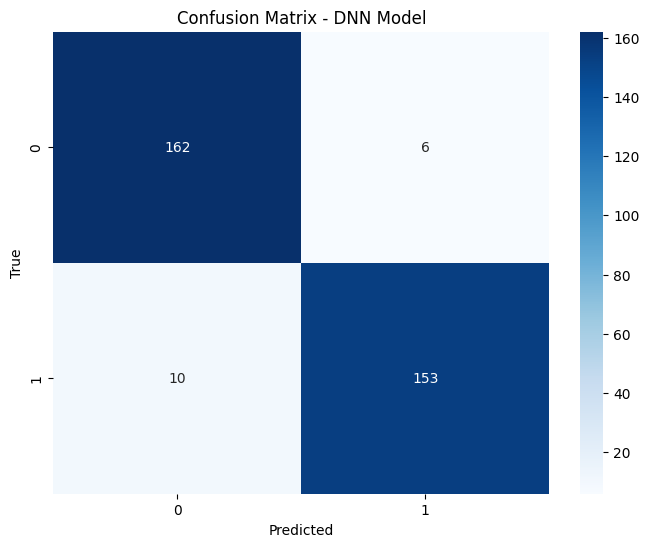

In [70]:
#Dense Neural Network metrics Calculation
dnn_accuracy = accuracy_score(y_test, y_pred_labels)
dnn_precision = precision_score(y_test, y_pred_labels, average='weighted')
dnn_recall = recall_score(y_test, y_pred_labels, average='weighted')
dnn_f1 = f1_score(y_test, y_pred_labels, average='weighted')

#Display DNN metrics
print("Accuracy: %.4f" % (dnn_accuracy))
print("DNN Precision: %.4f" % dnn_precision)
print("DNN Recall: %.4f" % dnn_recall)
print("DNN F1-Score: %.4f" % dnn_f1)
print("Classification Report: " "\n", classification_report(y_test, y_pred_labels))
print("Confusion Matrix: ", "\n", confusion_matrix(y_test, y_pred_labels))

#Create and display heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred_labels), annot=True, fmt='d', cmap='Blues', xticklabels = classes, yticklabels = classes)
plt.title('Confusion Matrix - DNN Model')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

Comparison of Models

In [71]:
#Classifiers and corresponding colors
classifiers = ['Naive Bayes', 'Random Forest', 'Logistic Regression', 'KNN', 'SVM RBF', 'SVM Linear', 'DNN Model']

#Metric Variables
accuracy_scores = [naiveBayesAccuracy, randomForestAccuracy, logisticRegressionAccuracy, KNN_Accuracy, svmRBF_Accuracy, svm_linear_Accuracy,dnn_accuracy]
precision_scores = [naiveBayesPrecision, randomForestPrecision, logisticRegressionAccuracy, KNN_Precision, svmRBF_Precision, svm_Linear_Precision, dnn_precision]
recall_scores = [naiveBayesRecall, randomForestRecall, logisticRegressionAccuracy, KNN_Recall, svmRBF_Recall, svm_Linear_Recall, dnn_recall]
f1_scores = [naiveBayesf1, randomForestF1, logisticRegressionAccuracy, KNN_F1, svmRBF_F1, svm_Linear_F1, dnn_f1]

#Define metrics variable to define the 4 metrics calculated
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']

#Data for each of the metrics
data = [accuracy_scores, precision_scores, recall_scores, f1_scores]

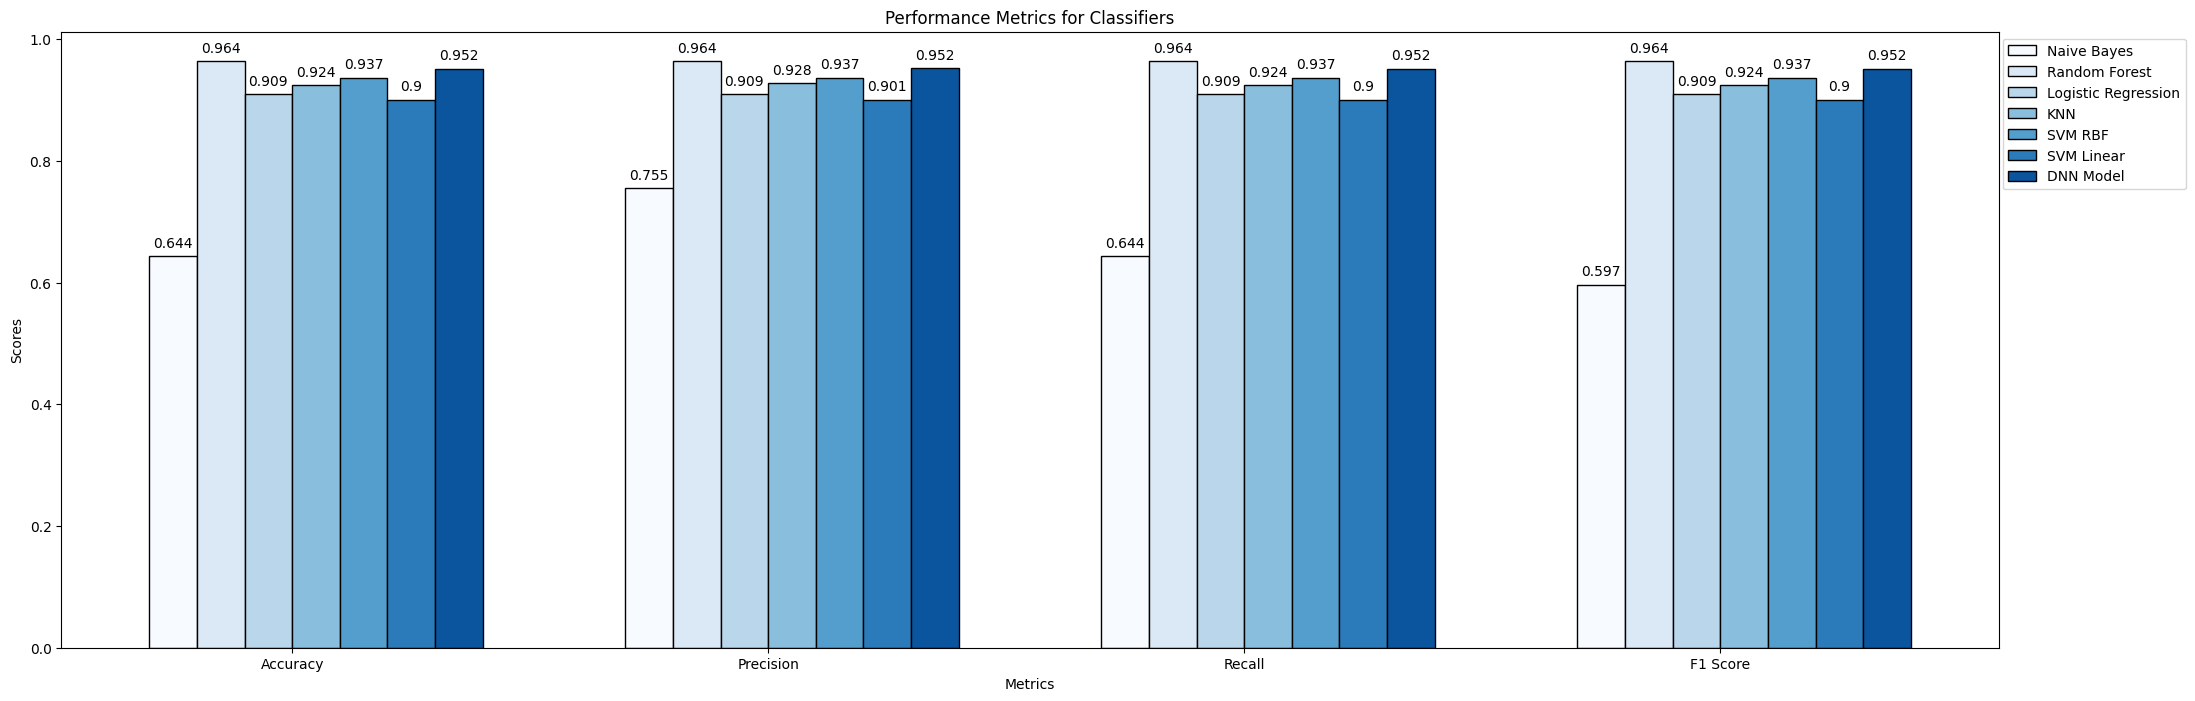

In [72]:
from matplotlib.cm import Blues

fig, ax = plt.subplots(figsize=(25, 8))

x = np.arange(len(metrics))

# Width of each bar
width = 0.1

# Create a range of blue colors using the 'Blues' colormap
color_map = Blues
colors = [color_map(i / len(classifiers)) for i in range(len(classifiers))]

# Classifier and plot bars with a range of blue colors
for i, classifier in enumerate(classifiers):
    bars = ax.bar(x + i * width, [d[i] for d in data], width, label=classifier, color=colors[i], edgecolor='black')
    for bar in bars:
        yval = bar.get_height()
        ax.text(bar.get_x() + bar.get_width() / 2, yval + 0.01, round(yval, 3), ha='center', va='bottom')

# Labels, Graph title, and Legend on the left
ax.set_xlabel('Metrics')
ax.set_ylabel('Scores')
ax.set_title('Performance Metrics for Classifiers')
ax.set_xticks(x + 2.5 * width)
ax.set_xticklabels(metrics)
ax.legend(loc='upper right', bbox_to_anchor=(1.1, 1), ncol=1)

# Display the plot
plt.show()